In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
des = pd.read_excel('EastWestAirlines.xlsx', sheet_name='Description')

In [3]:
des

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


East-West Airlines is trying to learn more about its customers. Key issues are their flying patterns, earning and use of frequent flyer rewards, and use of the airline credit card. The task is to identify customer segments via clustering.

In [4]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df1 = df.drop(columns=['ID#'])
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
df1.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [9]:
df1.duplicated().sum()

np.int64(1)

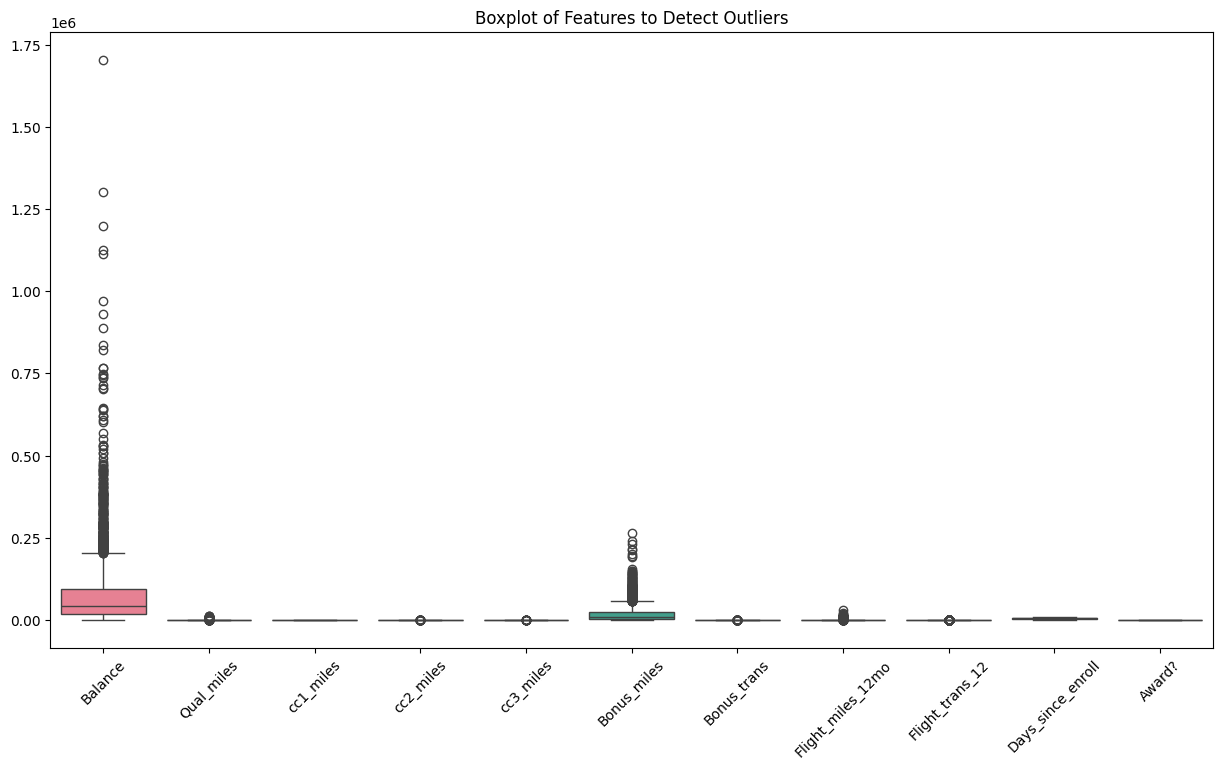

In [10]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1)
plt.xticks(rotation=45)
plt.title("Boxplot of Features to Detect Outliers")
plt.show()

In [11]:
def remove_outliers_iqr(dataset):
    Q1 = df1.quantile(0.25)
    Q3 = df1.quantile(0.75)
    IQR = Q3 - Q1
    
    
    # Defining bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_cleaned = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_cleaned

In [12]:
df_cleaned = remove_outliers_iqr(dataset=df1)

In [13]:
df_cleaned.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0


In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2875 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            2875 non-null   int64
 1   Qual_miles         2875 non-null   int64
 2   cc1_miles          2875 non-null   int64
 3   cc2_miles          2875 non-null   int64
 4   cc3_miles          2875 non-null   int64
 5   Bonus_miles        2875 non-null   int64
 6   Bonus_trans        2875 non-null   int64
 7   Flight_miles_12mo  2875 non-null   int64
 8   Flight_trans_12    2875 non-null   int64
 9   Days_since_enroll  2875 non-null   int64
 10  Award?             2875 non-null   int64
dtypes: int64(11)
memory usage: 269.5 KB


After outlier removal, the dataset has 2875 rows, a reduction from 3999 rows, suggesting that 1124 extreme values were eliminated.

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df_cleaned), columns=df_cleaned.columns)

In [16]:
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072
1,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072
2,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072
3,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072
4,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072


#### Exploratory Data Analysis

<Axes: >

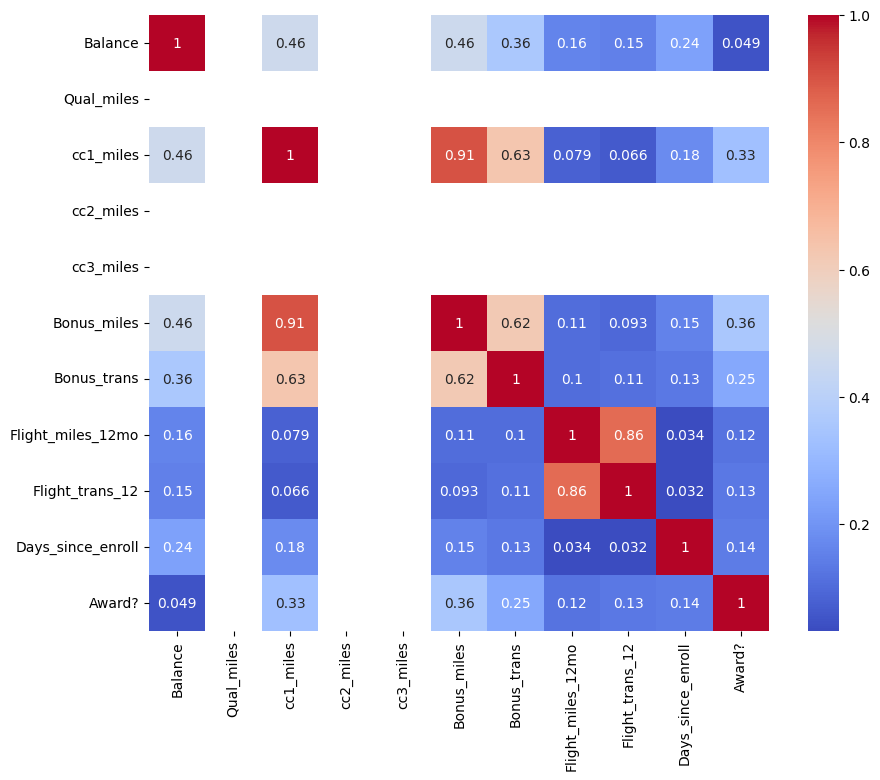

In [17]:
# Correlation Heat Map
plt.figure(figsize=(10,8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')

- The correlation coefficient between Bonus_miles and Bonus_trans (0.62) is moderately positive.
- CC1_miles and Bonus_trans (0.63) exhibit a moderate positive correlation with each other.
- Bonus_miles and cc1_miles exhibit a strong positive correlation (0.91).
- Bonus_trans (0.36), cc1_miles (0.46), Bonus_miles (0.46) exhibit moderately positive correlations - with Balance.
- The correlation coefficient between Flight_miles_12mo and Flight_miles_12 (0.86) is highly positive, - indicating a strong linear relationship between the two variables.
- Days_since_enroll is weally correlated with other features.

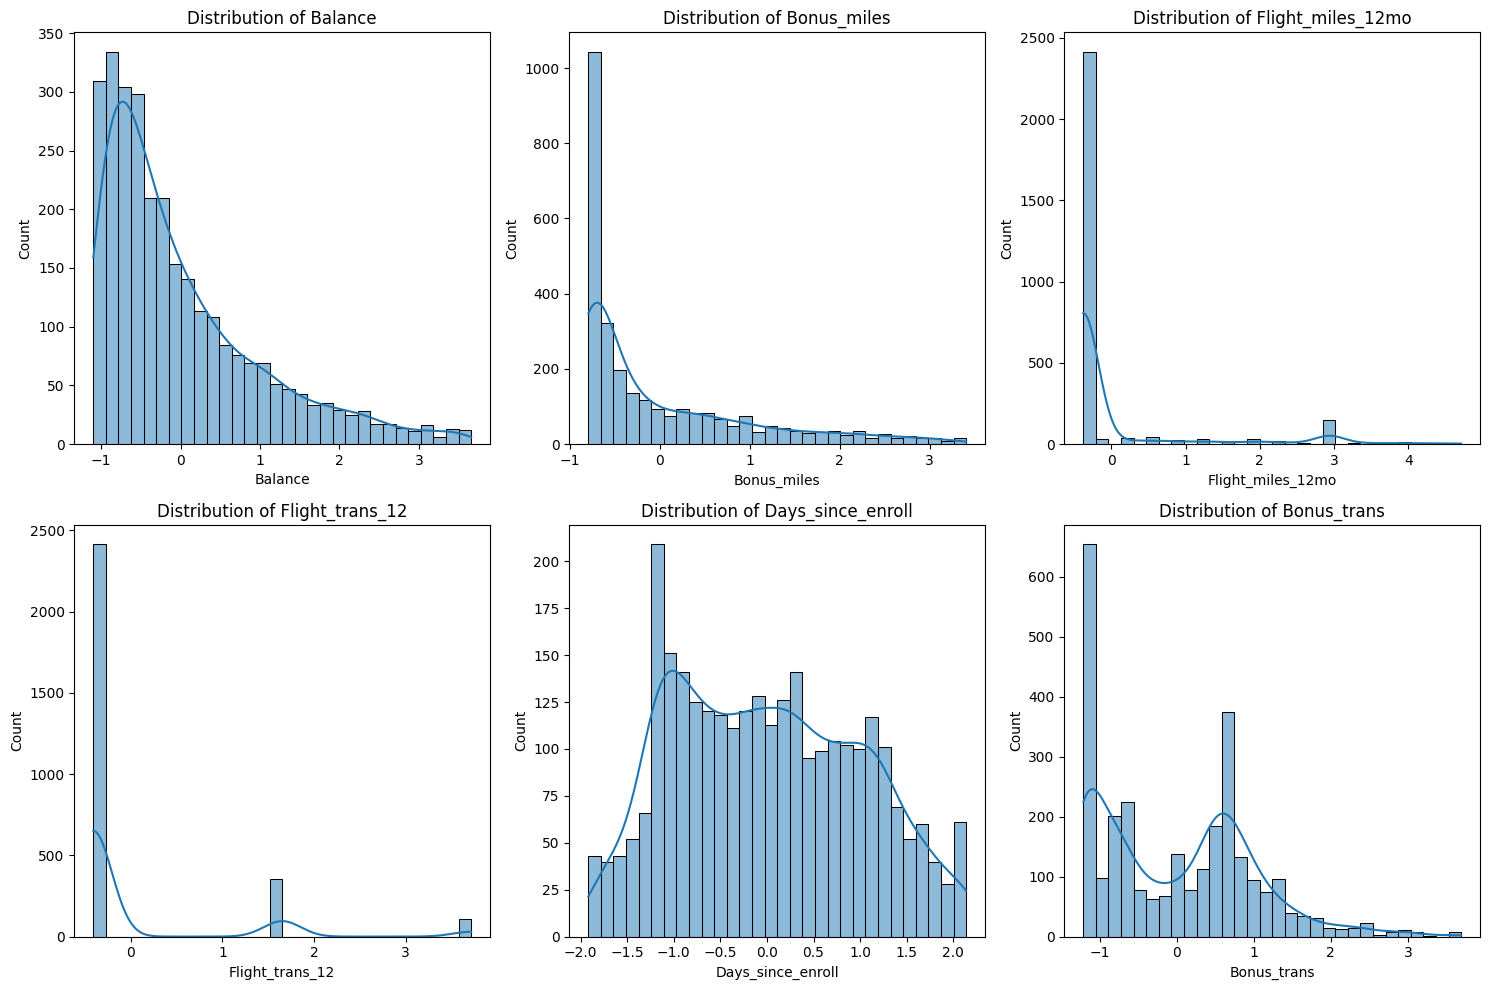

In [18]:
# Plotting distribution of selected features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = ["Balance", "Bonus_miles", "Flight_miles_12mo", "Flight_trans_12", "Days_since_enroll", "Bonus_trans"]

for i, ax in enumerate(axes.flatten()):
    if i < len(features):
        sns.histplot(df_scaled[features[i]], bins=30, kde=True, ax=ax)
        ax.set_title(f"Distribution of {features[i]}")

plt.tight_layout()
plt.show()

- Most distributions are right-skewed (right-tailed), indicating a few high value customers.
- Flight_trans_12, Flight_miles_12mo, Days_since_enroll, Bonus_trans have wide variations in values.

#### K-Means Clustering

In [19]:
from sklearn.cluster import KMeans

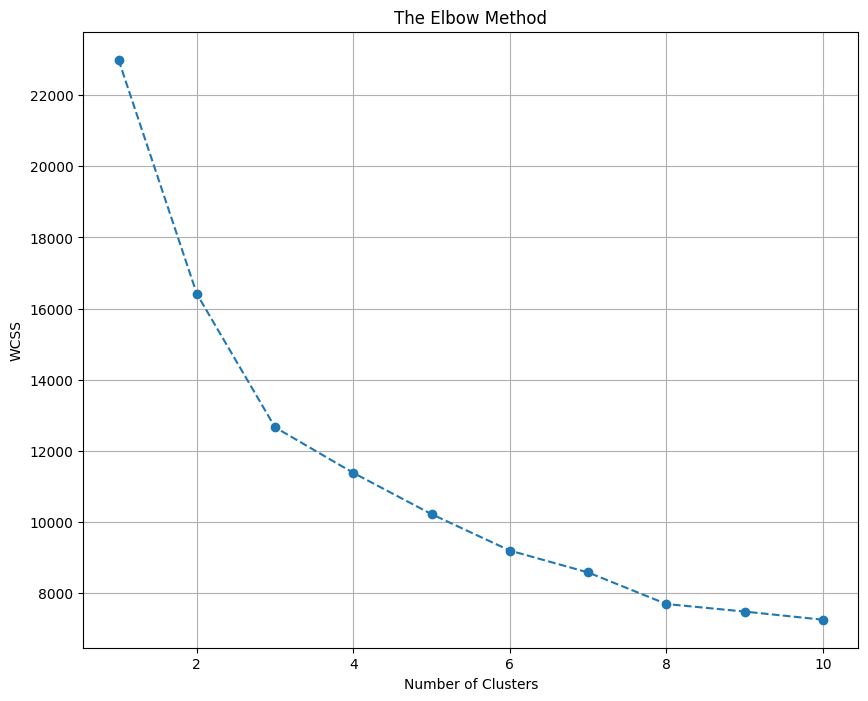

In [20]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(10, 8))
WCSS = []

for i in range(1, 11):
    clf = KMeans(n_clusters=i, random_state=42)
    clf.fit(df_scaled)
    WCSS.append(clf.inertia_)
    
plt.plot(range(1, 11), WCSS, marker = 'o', linestyle='--')
plt.title("The Elbow Method")
plt.ylabel("WCSS")
plt.xlabel("Number of Clusters")
plt.grid()
plt.show()

In [21]:
WCSS

[23000.0,
 16416.789022423705,
 12660.343183196434,
 11379.380926227075,
 10218.002164653117,
 9194.244627420532,
 8578.486890331318,
 7691.265843762761,
 7478.459649790082,
 7249.845411739928]

##### The Elbow Curve shows a significant drop in inertia upto k = 3 or 4, suggesting 3 or 4 clusters might be optimal.

##### For k = 3

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

In [23]:
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_KMeans
0,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072,1
1,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072,1
2,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072,1
3,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072,1
4,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2870,-0.665761,0.0,-0.719055,0.0,0.0,-0.171862,-0.694742,0.948432,1.653181,-1.235018,1.604952,2
2871,0.411806,0.0,-0.719055,0.0,0.0,-0.724061,-0.565745,-0.378837,-0.409708,-1.238933,1.604952,1
2872,0.628028,0.0,1.013789,0.0,0.0,1.066780,-0.178756,-0.378837,-0.409708,-1.235507,1.604952,0
2873,0.189152,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,2.939335,1.653181,-1.235997,-0.623072,2


In [24]:
df_scaled.iloc[:,:].groupby(df_scaled.Cluster_KMeans).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_KMeans
Cluster_KMeans,,,,,,,,,,,,
0,0.616121,0.0,1.140654,0.0,0.0,1.010188,0.852631,-0.343893,-0.306680,0.304982,0.459328,0.0
1,-0.428441,0.0,-0.659667,0.0,0.0,-0.603595,-0.526273,-0.350533,-0.336484,-0.183691,-0.327184,1.0
2,0.436862,0.0,0.202722,0.0,0.0,0.267498,0.302115,2.432613,2.277778,0.087396,0.360972,2.0


In [25]:
sklearn.metrics.silhouette_score(df_scaled, kmeans.labels_)

0.36573682912285854

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

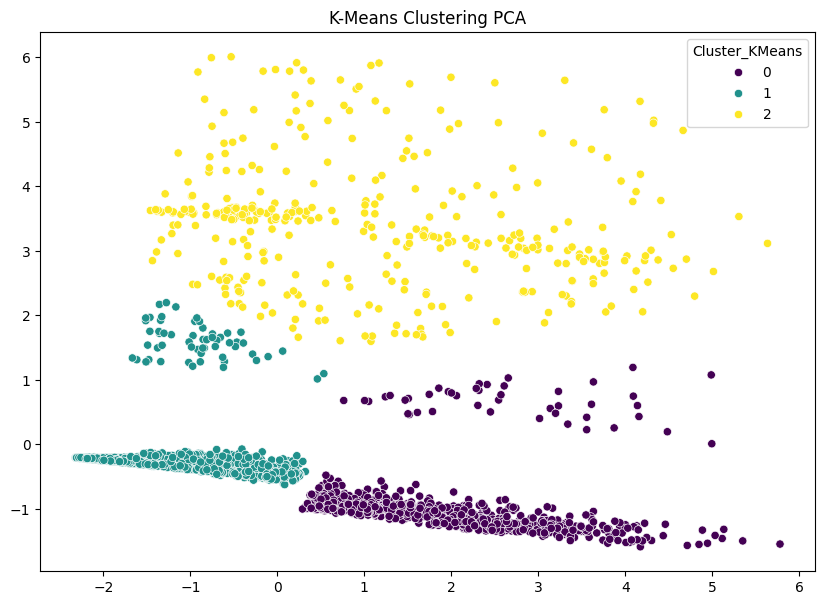

In [27]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_scaled, x=pca_result[:, 0], y=pca_result[:, 1], hue=df_scaled['Cluster_KMeans'], palette='viridis')
plt.title("K-Means Clustering PCA")
plt.show()

##### For k = 4

In [28]:
kmeans2 = KMeans(n_clusters=4, random_state=42)
df_scaled['Cluster_KMeans'] = kmeans2.fit_predict(df_scaled)

In [29]:
df_scaled.iloc[:,:].groupby(df_scaled.Cluster_KMeans).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_KMeans
Cluster_KMeans,,,,,,,,,,,,
0,0.436862,0.0,0.202722,0.0,0.0,0.267498,0.302115,2.432613,2.277778,0.087396,0.360972,0.0
1,-0.451647,0.0,-0.665678,0.0,0.0,-0.609841,-0.543510,-0.350264,-0.336537,-0.193116,-0.331917,1.0
2,1.014777,0.0,1.031877,0.0,0.0,0.836096,0.823324,-0.358055,-0.336495,0.278297,-0.595163,2.0
3,0.192185,0.0,1.171320,0.0,0.0,1.126401,0.863140,-0.329505,-0.275067,0.339327,1.604952,3.0


In [30]:
sklearn.metrics.silhouette_score(df_scaled, kmeans2.labels_)

0.3601795351360704

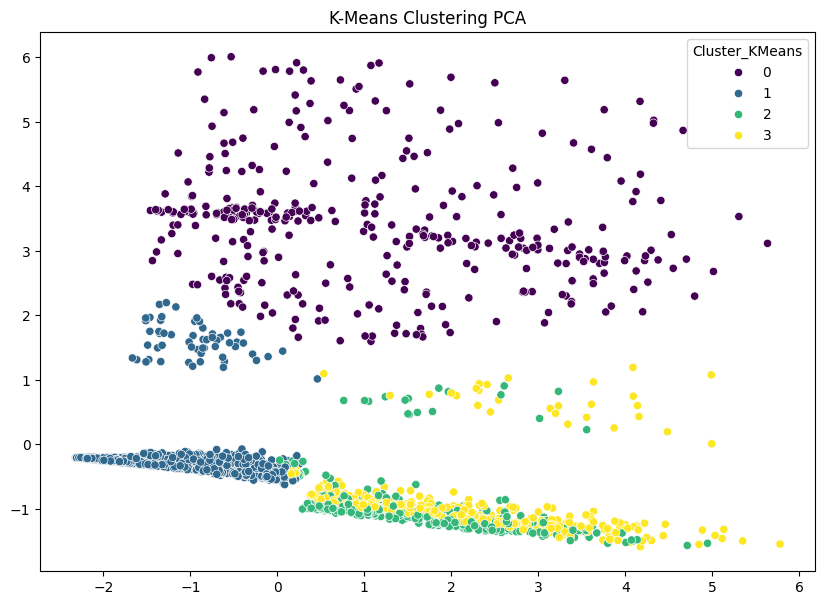

In [31]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_scaled, x=pca_result[:, 0], y=pca_result[:, 1], hue=df_scaled['Cluster_KMeans'], palette='viridis')
plt.title("K-Means Clustering PCA")
plt.show()

In [32]:
df_scaled.drop(columns=['Cluster_KMeans'], inplace=True)

##### The silhouette score for k = 3 is 0.3653, while for k = 4, it is 0.4115. Therefore, k = 4 is preferable as it yields a higher silhouette score.

##### Hierarchical Clustering

Average Linkage Criteria

In [33]:
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072
1,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072
2,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072
3,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072
4,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072


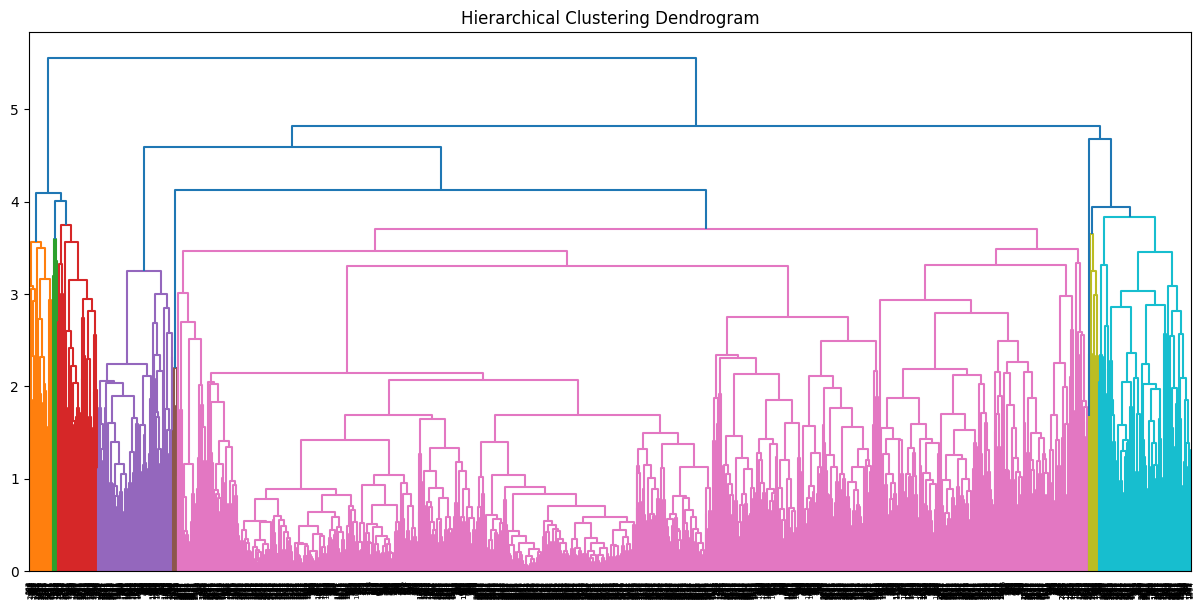

In [34]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

z = linkage(df_scaled, method='average', metric='euclidean')
plt.figure(figsize = (15, 7))
plt.title("Hierarchical Clustering Dendrogram")
sch.dendrogram(z)
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering
h_avg = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean').fit(df_scaled)
cluster_labels = pd.Series(h_avg.labels_)
df_scaled['Clust'] = cluster_labels
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072,2
1,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072,2
2,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072,2
3,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072,2
4,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072,2


In [36]:
df_scaled[df_scaled['Clust']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072,2
1,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072,2
2,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072,2
3,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072,2
4,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2868,-0.836988,0.0,-0.719055,0.0,0.0,-0.727867,0.337231,-0.378837,-0.409708,-1.233061,-0.623072,2
2869,-1.006149,0.0,-0.719055,0.0,0.0,-0.769150,-0.823739,-0.378837,-0.409708,-1.237954,-0.623072,2
2871,0.411806,0.0,-0.719055,0.0,0.0,-0.724061,-0.565745,-0.378837,-0.409708,-1.238933,1.604952,2
2872,0.628028,0.0,1.013789,0.0,0.0,1.066780,-0.178756,-0.378837,-0.409708,-1.235507,1.604952,2


In [37]:
sklearn.metrics.silhouette_score(df_scaled, h_avg.labels_)

0.35511315054490333

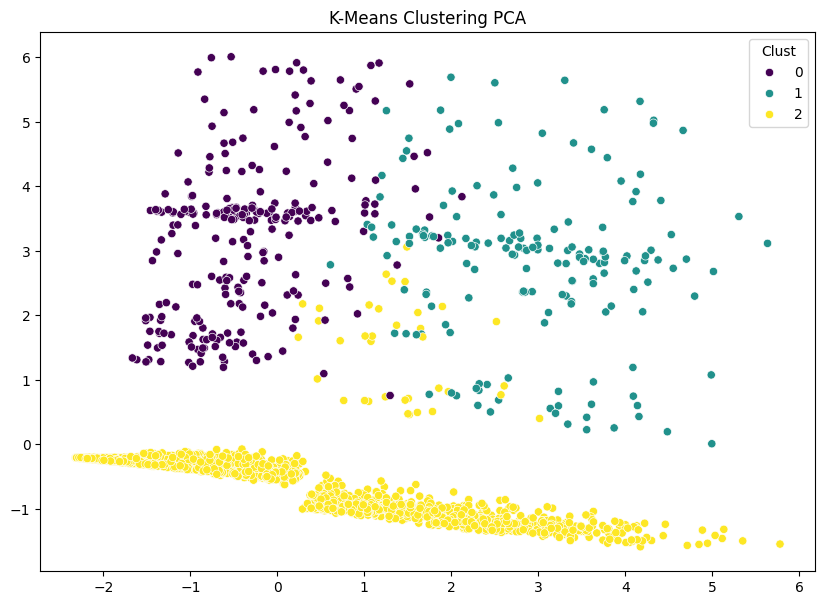

In [38]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_scaled, x=pca_result[:, 0], y=pca_result[:, 1], hue=df_scaled['Clust'], palette='viridis')
plt.title("K-Means Clustering PCA")
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering
h_avg = AgglomerativeClustering(n_clusters=4, linkage='average', metric='euclidean').fit(df_scaled)
cluster_labels = pd.Series(h_avg.labels_)
df_scaled['Clust'] = cluster_labels
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072,0
1,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072,0
2,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072,0
3,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072,0
4,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072,0


In [40]:
sklearn.metrics.silhouette_score(df_scaled, h_avg.labels_)

0.33159554048291123

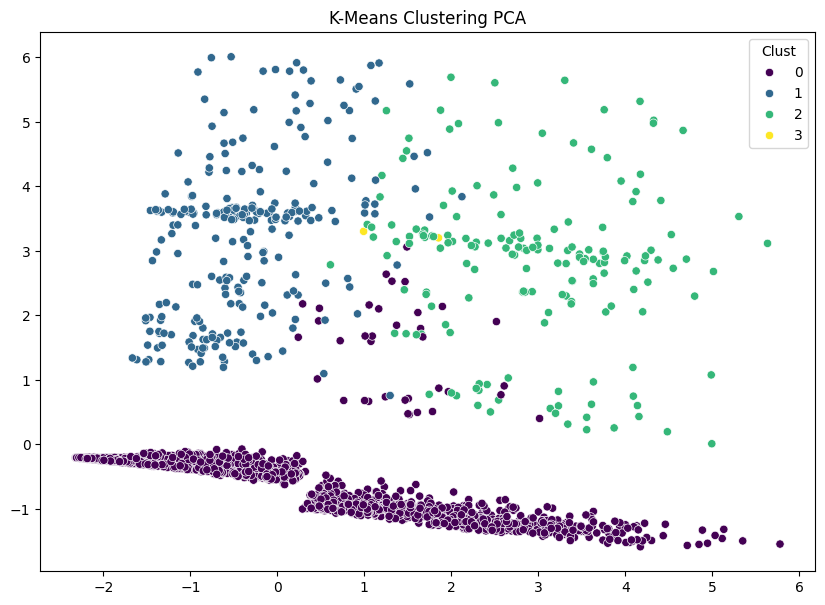

In [41]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_scaled, x=pca_result[:, 0], y=pca_result[:, 1], hue=df_scaled['Clust'], palette='viridis')
plt.title("K-Means Clustering PCA")
plt.show()

In [42]:
df_scaled.drop(columns=['Clust'], inplace=True)

In Hierarchical Clustering with “average” linkage, the value of k is preferable to k = 3, as the silhouette score is higher for k = 3 than 4.

#### Complete Linkage Criteria

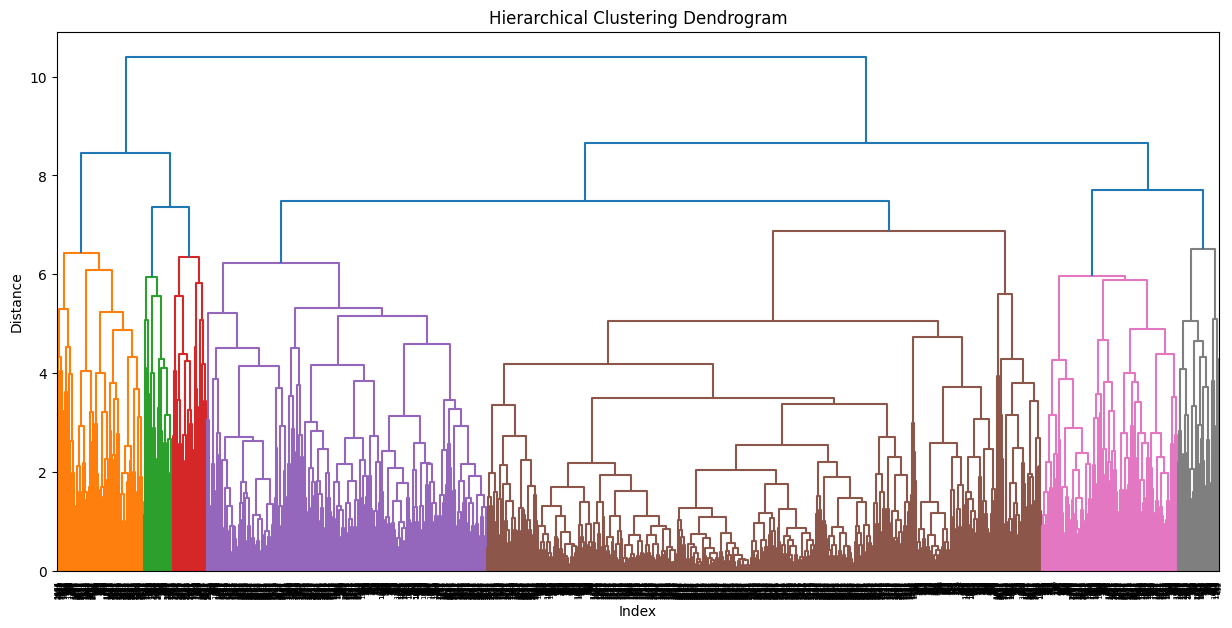

In [43]:
z = linkage(df_scaled, method='complete', metric='euclidean')
plt.figure(figsize = (15, 7))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(z)
plt.show()

In [44]:
from sklearn.cluster import AgglomerativeClustering
h_cmpl = AgglomerativeClustering(n_clusters=4, linkage='complete', metric='euclidean').fit(df_scaled)
cluster_labels = pd.Series(h_cmpl.labels_)
df_scaled['Clust'] = cluster_labels
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072,2
1,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072,2
2,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072,2
3,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072,2
4,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072,2


In [45]:
sklearn.metrics.silhouette_score(df_scaled, h_cmpl.labels_)

0.35042461942345454

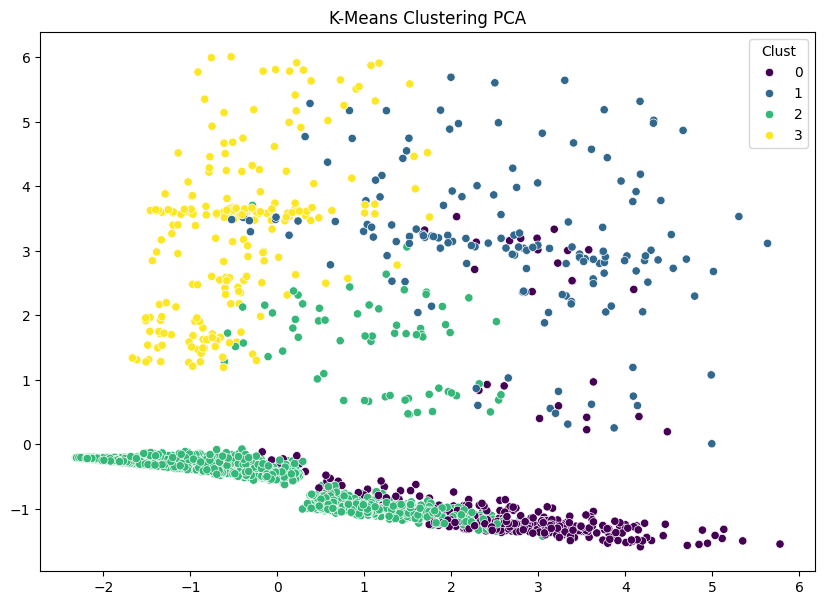

In [46]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_scaled, x=pca_result[:, 0], y=pca_result[:, 1], hue=df_scaled['Clust'], palette='viridis')
plt.title("K-Means Clustering PCA")
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering
h_cmpl = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean').fit(df_scaled)
cluster_labels = pd.Series(h_cmpl.labels_)
df_scaled['Clust'] = cluster_labels
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072,2
1,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072,2
2,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072,2
3,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072,2
4,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072,2


In [48]:
sklearn.metrics.silhouette_score(df_scaled, h_cmpl.labels_)

0.3360029046275666

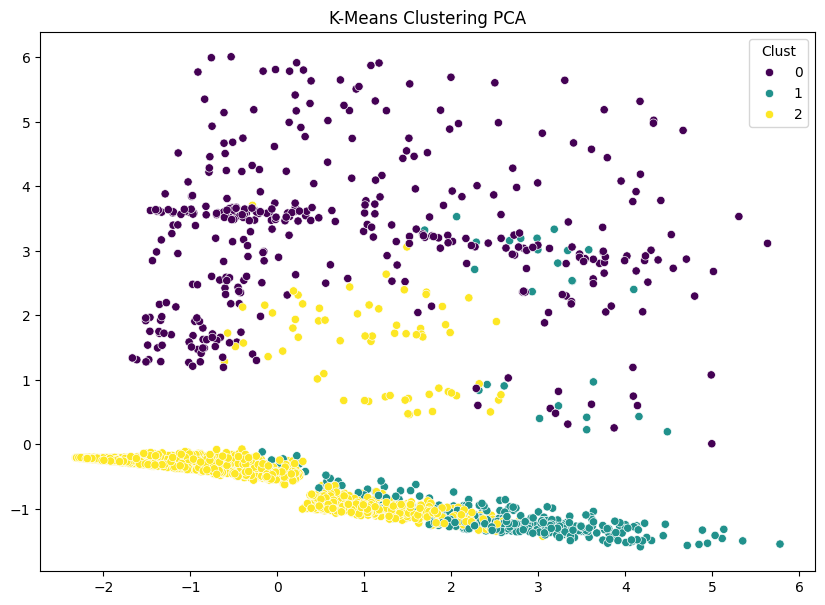

In [49]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_scaled, x=pca_result[:, 0], y=pca_result[:, 1], hue=df_scaled['Clust'], palette='viridis')
plt.title("K-Means Clustering PCA")
plt.show()

In [50]:
df_scaled.drop(columns=['Clust'], inplace=True)

#### DBSCAN - Density Based Spatial Clustering of Applications with Noise

In [51]:
from sklearn.neighbors import NearestNeighbors

In [52]:
neigh = NearestNeighbors(n_neighbors=16)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

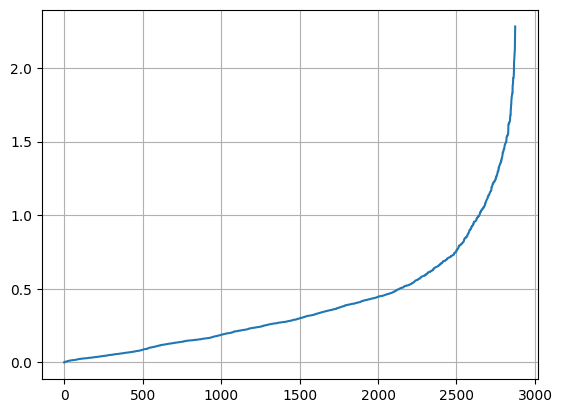

In [53]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.grid()

In [54]:
from sklearn.cluster import DBSCAN

In [55]:
dbscan = DBSCAN(eps=1.65, min_samples=9)
dbscan.fit(df_scaled)

,eps,1.65
,min_samples,9
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [56]:
df_scaled['Clust'] = pd.DataFrame(dbscan.labels_)

In [57]:
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072,0
1,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072,0
2,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072,0
3,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072,0
4,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072,0


In [58]:
import sklearn
sklearn.metrics.silhouette_score(df_scaled, dbscan.labels_)

0.3434680585486805

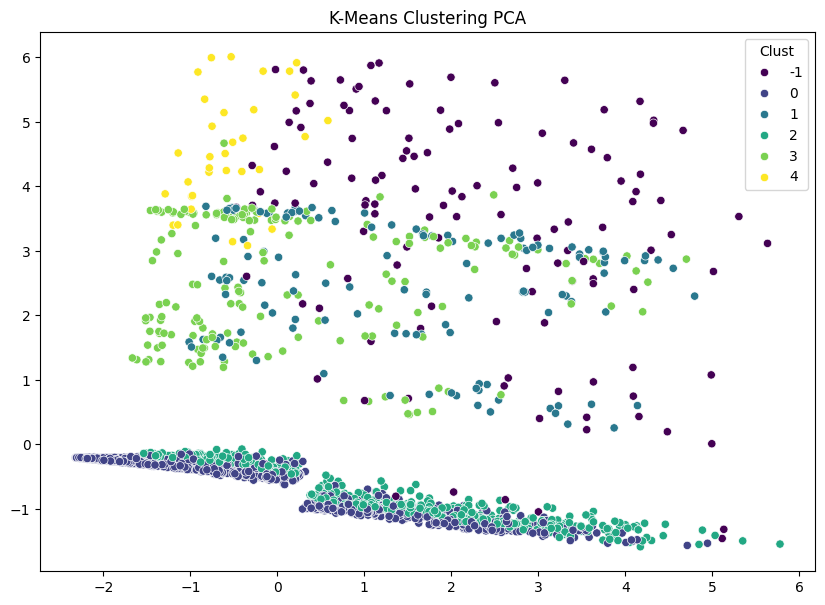

In [59]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_scaled, x=pca_result[:, 0], y=pca_result[:, 1], hue=df_scaled['Clust'], palette='viridis')
plt.title("K-Means Clustering PCA")
plt.show()

In [60]:
dbscan = DBSCAN(eps=1.55, min_samples=9)
dbscan.fit(df_scaled)

,eps,1.55
,min_samples,9
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [61]:
df_scaled['Clust'] = pd.DataFrame(dbscan.labels_)

In [62]:
sklearn.metrics.silhouette_score(df_scaled, dbscan.labels_)

0.3416859135653573

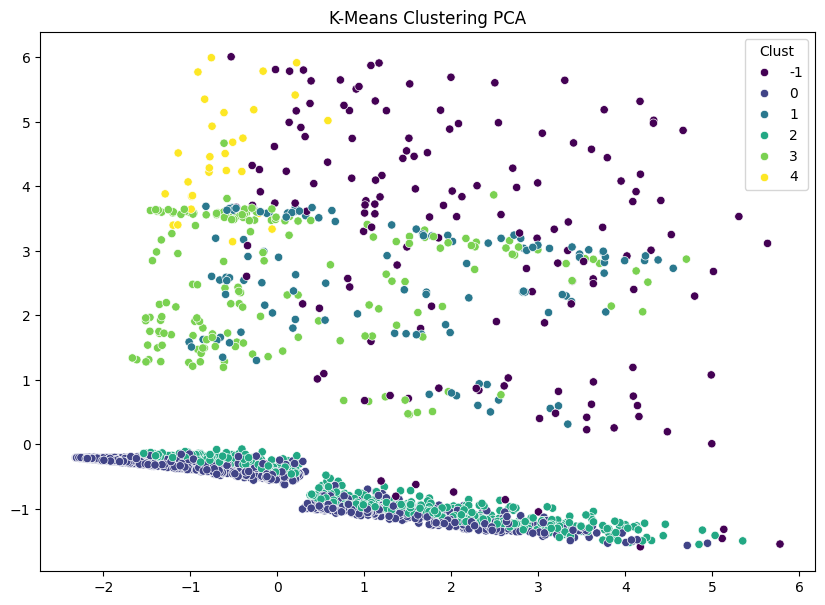

In [63]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_scaled, x=pca_result[:, 0], y=pca_result[:, 1], hue=df_scaled['Clust'], palette='viridis')
plt.title("K-Means Clustering PCA")
plt.show()

## K-Means and Hierarchical clustering produced similar structures, while DBSCAN identified density based groups with noise.